In [18]:
#Load Imports
import cv2
from matplotlib import pyplot as plt
import numpy as np

# Load the image as grayscale image
img = cv2.imread("grapes.pgm", cv2.IMREAD_GRAYSCALE)
img.shape

(512, 512)

In [19]:
#The function gets a grayscale image as input and returns the filled histogram
def histogram(img):
    hist = np.zeros(256)
    flat_img = img.flatten()
    unique_values, counts = np.unique(flat_img, return_counts=True)
    hist[unique_values] = counts
    return hist
histogram(img)

array([  57.,  465., 1004.,  754.,  772.,  789.,  809.,  838.,  892.,
        998., 1015., 1084., 1176., 1133., 1232., 1143., 1301., 1203.,
       1286., 1335., 1356., 1353., 1339., 1327., 1299., 1354., 1263.,
       1272., 1155., 1112., 1174., 1083., 1087., 1006., 1030., 1034.,
       1001., 1020., 1076., 1092., 1167., 1133., 1170., 1107., 1169.,
       1073., 1048., 1047., 1039., 1019., 1007.,  933.,  971.,  896.,
        953.,  897.,  882.,  830.,  840.,  818.,  797.,  736.,  786.,
        691.,  765.,  667.,  666.,  648.,  660.,  681.,  658.,  635.,
        650.,  594.,  659.,  644.,  661.,  642.,  586.,  666.,  639.,
        640.,  703.,  665.,  649.,  644.,  675.,  700.,  643.,  624.,
        657.,  656.,  610.,  610.,  657.,  612.,  662.,  642.,  599.,
        615.,  680.,  672.,  691.,  632.,  692.,  700.,  725.,  711.,
        726.,  725.,  703.,  763.,  804.,  828.,  856.,  814.,  872.,
        970.,  995., 1044., 1063., 1175., 1210., 1168., 1225., 1245.,
       1210., 1303.,

In [20]:
#Calculate OTSU Threshold
def otsu_threshold(img):            
       
    # Step 1: Compute the histogram
    hist = histogram(img)

    # Step 2: Compute relative histogram
    total_pixels = img.size
    relative_hist = hist / total_pixels

    # Step 3: Iterate over all possible thresholds to find the optimal threshold
    optimal_threshold = 0
    max_j = 0

    for threshold in range(256):
        
        # Compute class probabilities
        p1 = np.sum(relative_hist[:threshold+1])
        p2 = 1 - p1

        # Compute mean values
        m1 = np.sum(np.arange(0, threshold+1) * relative_hist[:threshold+1]) / p1
        m2 = np.sum(np.arange(threshold+1, 256) * relative_hist[threshold+1:]) / p2

        # Compute between-class variance
        sigma_b_squared = p1 * p2 * (m1 - m2) ** 2

        # Compute J value
        J = sigma_b_squared

        # Update optimal threshold if J value is higher
        if J > max_j:
            max_j = J
            optimal_threshold = threshold

    return optimal_threshold

C:\Users\meet\AppData\Local\Temp\ipykernel_17012\1712041075.py:23: RuntimeWarning: invalid value encountered in scalar divide
  m2 = np.sum(np.arange(threshold+1, 256) * relative_hist[threshold+1:]) / p2


The Threshold you calculated is same!


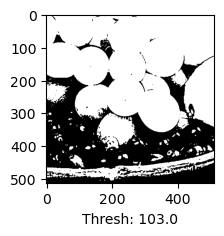

In [28]:
#Show Image
My_threshold = otsu_threshold(img)
_, thresh_image = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)

if My_threshold == _:
    print("The Threshold you calculated is same!")

    fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 2)
ax1.imshow(thresh_image, "gray")
plt.xlabel(f"Thresh: {_}")
plt.show()
